In [4]:
import numpy as np
import math
from math import exp
import numpy.linalg as linalg
from sklearn import metrics
import random
from sklearn.datasets import fetch_mldata
import cvxopt
from cvxopt import solvers
import cvxopt.base
from scipy.spatial.distance import cdist
from pylab import *
%matplotlib inline

In [5]:
def data(size,features,deviation):
    w = np.array([0.6,0.6])
    w0 = np.array([0])
    n = size/2
    #Normalized distributed data:
    X = np.append((np.random.randn(n,features)+deviation),(np.random.randn(n,features)-deviation),axis =0)
    #print X
    Y = []
    for i in range(len(X)):
        if (w0 + np.dot(w,X[i])) > 0:
            Y.append([1.0])
        elif (w0 + np.dot(w,X[i])) < 0:
            Y.append([-1.0])
    #print Y
    Y = np.array(Y)
    #lists used to plot the data
    X_pos = []
    X_neg = []
    x_neg = []
    y_neg = []
    x_pos = []
    y_pos = []
    #separating based on features.
    for i in range(len(Y)):
        if Y[i] == 1:
            X_pos.append(X[i])
            #print X[i]
        elif Y[i] == -1:
            X_neg.append(X[i])
    #print X_pos
    #print X_neg
    
    for j in range(len(X_pos)):
        x_pos.append(X_pos[j][0])
        y_pos.append(X_pos[j][1])
    #print x_pos
    #print y_pos

    for j in range(len(X_neg)):
        x_neg.append(X_neg[j][0])
        y_neg.append(X_neg[j][1])
        
    
    plt.plot(x_neg,y_neg,'ro')
    plt.plot(x_pos,y_pos,'bo')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    return X,Y

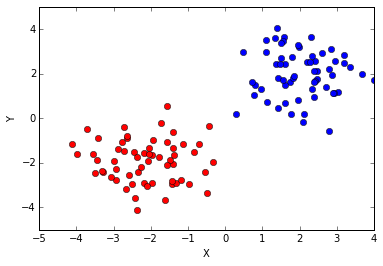

In [6]:
#linearly separable data
X_lin,Y_lin = data(120,2,2.0)

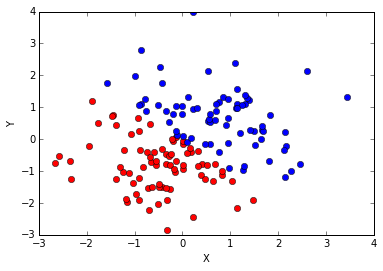

In [7]:
#linearly non separable data
X_non,Y_non = data(150,2,0.5)

In [8]:
def hard(x,y):
    poly_kernal = []
    for a in range(len(x)):
        list1 = []
        for b in range(len(x)):
            list1.append((np.dot(x[a],x[b])+1)**1)
        poly_kernal.append(list1)
    poly_kernal = np.array(poly_kernal)
    W = 0
    W0 = 0
    var = x.shape[0]
    epsilon = 0
    p = cvxopt.base.matrix(np.ndarray.tolist(np.dot(y,y.T) * poly_kernal))
    print type(p)
    q = cvxopt.base.matrix([-1.0] * var)
    gtemp = np.zeros((var, var), float)
    np.fill_diagonal(gtemp, -1.0)
    g = cvxopt.base.matrix(np.ndarray.tolist(gtemp))
    h = cvxopt.base.matrix([0.0] * var)
    a = cvxopt.base.matrix(np.ndarray.tolist(y))
    #b = [1.0]
    b = cvxopt.base.matrix(1.0)
    ld = solvers.qp(p,q,g,h,a,b) #dual problem minimization
    alpha_val = cvxopt.base.matrix(ld['x'])
    support_vector = []
    for i in range(len(alpha_val)):
            if alpha_val[i] > epsilon:
                support_vector.append(x[i])
    support_vector1 = np.matrix(support_vector)
    print support_vector1
    for j in range(len(alpha_val)):
        W = W + (alpha_val[j] * y[j] * x[i])
    for k in range((len(y))):
        W0 = W0 + (y[k] - np.dot(W,x[k]))
    W0 = W0 / len(support_vector1)
    
    return W, W0, support_vector1
    

In [9]:
def predict(x,w,w0):
    predict = []
    for i in range(len(x)):
        var1 = np.dot(w,x[i]) + w0
        if var1 < 0:
            predict.append([1])
        else:
            predict.append([-1])
    return np.array(predict)

In [10]:
def accuracy(labels,predicted):
    return metrics.accuracy_score(labels, predicted)

In [11]:
W_lin, W0_lin, SupportVector = hard(X_lin,Y_lin)

<type 'cvxopt.base.matrix'>
     pcost       dcost       gap    pres   dres
 0: -1.0261e+01 -1.9981e+01  3e+02  2e+01  2e+00
 1: -1.3608e+01 -1.0412e+01  1e+02  6e+00  7e-01
 2: -5.5112e+01 -3.3477e+01  1e+02  5e+00  6e-01
 3: -5.5012e+01 -1.9669e+01  9e+01  2e+00  3e-01
 4: -9.0647e+00 -3.8703e+00  2e+01  4e-01  5e-02
 5: -7.2660e-01 -2.6260e+00  2e+00  1e-03  2e-04
 6: -2.0986e+00 -2.2193e+00  1e-01  3e-05  3e-06
 7: -2.1983e+00 -2.1995e+00  1e-03  3e-07  3e-08
 8: -2.1993e+00 -2.1993e+00  1e-05  3e-09  3e-10
 9: -2.1993e+00 -2.1993e+00  1e-07  3e-11  3e-12
Optimal solution found.
[[ 2.78076904 -0.58125806]
 [ 2.31073595  3.63402399]
 [ 0.47423249  2.96664495]
 [ 2.1130171   0.19682736]
 [ 2.71835861  1.41938831]
 [ 1.57533792  3.6582953 ]
 [ 1.73444912  1.63822194]
 [ 3.03189565  1.16260953]
 [ 1.5007082   2.70300266]
 [ 1.61933384  1.4770517 ]
 [ 2.9537312   2.58262064]
 [ 0.27987764  0.20207284]
 [ 1.6110815   2.44499427]
 [ 2.45562541  1.75039687]
 [ 1.3833802   4.06298202]
 [ 2.

In [12]:
predict_lin = predict(X_lin, W_lin,  W0_lin)

In [13]:
acc = accuracy(Y_lin,predict_lin)
print "Accuracy:", acc

Accuracy: 1.0


In [14]:
W_non, W0_non, SupportVectorNon = hard(X_non,Y_non)

<type 'cvxopt.base.matrix'>
     pcost       dcost       gap    pres   dres
 0: -5.0493e+01 -1.0627e+02  6e+02  3e+01  2e+00
 1: -1.3963e+02 -1.6145e+02  4e+02  1e+01  1e+00
 2: -3.5285e+02 -3.6932e+02  4e+02  1e+01  1e+00
 3: -1.0414e+03 -1.0482e+03  4e+02  1e+01  1e+00
 4: -4.5067e+03 -4.4579e+03  6e+02  1e+01  1e+00
 5: -3.5634e+03 -3.5049e+03  1e+03  1e+01  1e+00
 6: -4.5444e+03 -4.2896e+03  2e+03  1e+01  9e-01
 7: -1.8539e+03 -2.4368e+03  4e+03  5e+00  4e-01
 8: -1.5498e+03 -1.6073e+03  2e+02  3e-01  2e-02
 9: -1.5095e+03 -1.5105e+03  4e+00  5e-03  4e-04
10: -1.5090e+03 -1.5090e+03  4e-02  5e-05  4e-06
11: -1.5090e+03 -1.5090e+03  4e-04  5e-07  4e-08
12: -1.5090e+03 -1.5090e+03  4e-06  5e-09  4e-10
Optimal solution found.
[[-0.19420338  0.7780222 ]
 [-0.43658467  1.7465667 ]
 [ 0.17202762 -0.41866383]
 [-0.99981915  1.97238775]
 [-0.13557453  1.04779246]
 [-0.8751678   1.0965026 ]
 [-0.00454068  1.03911668]
 [ 0.82852917 -1.11605888]
 [ 0.01470163 -0.15232528]
 [ 0.02110174 -0.049

In [15]:
predict_non = predict(X_non, W_non,  W0_non)

In [16]:
acc_non = accuracy(Y_non,predict_non)
print "Accuracy:", acc_non

Accuracy: 0.586666666667


In [17]:
def plotsupportvector(sv,x,y):
    xsv = []
    ysv = []
    X_pos = []
    X_neg = []
    x_neg = []
    y_neg = []
    x_pos = []
    y_pos = []
    sv = np.array(sv)
    for i in range(len(sv)):
        xsv.append(sv[0])
        ysv.append(sv[1])
    
    for j in range(len(y)):
        if y[j] == 1:
            X_pos.append(x[j])
            #print X[i]
        elif y[j] == -1:
            X_neg.append(x[j])
    
    for k in range(len(X_pos)):
        x_pos.append(X_pos[k][0])
        y_pos.append(X_pos[k][1])
    
    for l in range(len(X_neg)):
        x_neg.append(X_neg[l][0])
        y_neg.append(X_neg[l][1])
            
    plt.plot(x_neg,y_neg,'ro')
    plt.plot(x_pos,y_pos,'bo')
    plt.plot(xsv,ysv,'g^')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

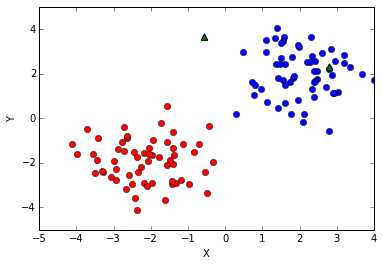

In [18]:
SVplot = plotsupportvector(SupportVector,X_lin,Y_lin)

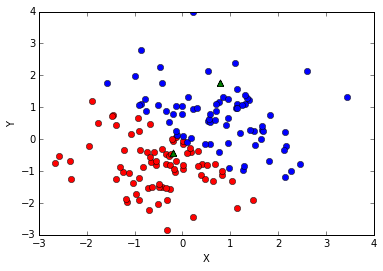

In [19]:
SVplot = plotsupportvector(SupportVectorNon,X_non,Y_non)